<a href="https://colab.research.google.com/github/logaritmabir/collab/blob/main/ML1-LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kadir Emre ÖZER - 19060374 - Makine Öğrenimine Giriş(TS7) - Proje-1: Regresyon(Doğrusal Bağlanım)


Adım 1 : Verilerin algoritmaya verilmeden önce işlenmesi(normalizasyon ve ayıklama)

Verilerin .cvs uzantılı dosyadan "data" değişkenine aktarılması,başlangıç için rastgele teta katsayılarının verilmesi,öğrenme katsayısının atanması(alfa),veriler içerisinde "NULL" olup olmadığı testi ve verilerin min-max normalizasyonu yapılmıştır.

(Normalizasyon için min-max normalizasyonu tercih edilmiştir.Kendim max normalizasyonunu tabloya uyguladığım zaman algoritmanın hızı yaklaşık 10 kat düştüğü için kütüphane fonksiyonunu kullanmayı tercih ettim)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data  = pd.read_csv("kc_house_data.csv")[['sqft_living','sqft_lot','price']]

Q0,Q1,Q2, = 100,100,100 #Başlangıç teta değerleri
m = len(data)
alfa = 0.03

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

data = pd.DataFrame(scaled_data,columns=['sqft_living','sqft_lot','price'])

# max_sqft_living = data.max(0)[0] # kolonların en büyük değerlerin çıkarılması
# max_sqft_lot = data.max(0)[1]
# max_price = data.max(0)[2]


# for i in range(m): # Verilerin normalleştirilmesi 
#      data.at[i,'sqft_living'] = data.values[i][0] / max_sqft_living
#      data.at[i,'sqft_lot'] = data.values[i][1] / max_sqft_lot
#      data.at[i,'price'] = data.values[i][2] / max_price

data.info()
print(data)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  21613 non-null  float64
 1   sqft_lot     21613 non-null  float64
 2   price        21613 non-null  float64
dtypes: float64(3)
memory usage: 506.7 KB
       sqft_living  sqft_lot     price
0         0.067170  0.003108  0.019266
1         0.172075  0.004072  0.060721
2         0.036226  0.005743  0.013770
3         0.126038  0.002714  0.069377
4         0.104906  0.004579  0.057049
...            ...       ...       ...
21608     0.093585  0.000370  0.037377
21609     0.152453  0.003206  0.042623
21610     0.055094  0.000503  0.042898
21611     0.098868  0.001132  0.042623
21612     0.055094  0.000337  0.032787

[21613 rows x 3 columns]


Tahmin Fonksiyonu: Hteta(x)

In [ ]:
def prediction(x1,x2): # Hteta(x) hipotezi
    return Q0 + (Q1*x1) + (Q2*x2)

Maliyet Fonksiyonu : J(teta0,teta1,teta2)

In [ ]:
def cost_function(): # Maliyet fonksiyonu
    total_differency = 0
    for i in range(m):
        iteration_differency = (data.values[i][2] - prediction(data.values[i][0],data.values[i][1]))**2 # Tüm örnekler için(26 bin) (y - tahmin)**2 hesabı 
        total_differency +=  iteration_differency
    cost = total_differency / (2*m)
    return cost

Gradient Descent Algoritması : 

Algoritma her çalıştığında teta parametrelerine azaltma veya artırma işlemi uygulayacaktır.


In [ ]:
def gradient_descent():
    global Q0,Q1,Q2 #Anlık tetaların dahil edilmesi

    total_differencyQ0 = 0  
    total_differencyQ1 = 0
    total_differencyQ2 = 0 

    Q0pre,Q1pre,Q2pre = 0,0,0

    for i in range(m): 
        iteration_differencyQ0 = (prediction(data.values[i][0],data.values[i][1]) - data.values[i][2]) # 0' dan m'ye kadar Teta0 için hata oranlarının hesaplanması 
        total_differencyQ0 =  total_differencyQ0 + iteration_differencyQ0 # Teta0 için hata oranlarının toplanması

        iteration_differencyQ1 = (prediction(data.values[i][0],data.values[i][1]) - data.values[i][2] ) * data.values[i][0] # Teta1 için aynı işlemler
        total_differencyQ1 =  total_differencyQ1 +  iteration_differencyQ1

        iteration_differencyQ2 = (prediction(data.values[i][0],data.values[i][1]) - data.values[i][2]) * data.values[i][1] # Teta2 için aynı işlemler
        total_differencyQ2 = total_differencyQ2 + iteration_differencyQ2
    
    Q0pre = Q0 - (alfa * (1/m) * total_differencyQ0) # Yeni Teta0 değeri hesabı
    Q1pre = Q1 - (alfa * (1/m) * total_differencyQ1) # Yeni Teta1 değeri hesabı
    Q2pre = Q2 - (alfa * (1/m) * total_differencyQ2) # Yeni Teta2 değeri hesabı

    Q0 = Q0pre # Tetaların aynı anda değiştirilmesi
    Q1 = Q1pre
    Q2 = Q2pre

    print("Yeni teta değerleri  : " ,Q0,Q1,Q2)

Adım 2 : Gradient Descent Algoritması'nın Sınanması
Algoritmanın çalışıp çalışmadığını test etmek için ilk 150 veri üzerinde Maliyet Fonksiyonu iyileştirmesi denenmiştir.

Her for döngüsünde Maliyet fonksiyonunun değeri hesaplanacak ve teta parametreleri yeniden düzenlecektir.

Maliyet Fonksiyonunun her adımdaki değeri "graph" değişkeni içerisinde tutulup daha sonra görsel çıktı üzerinde yorumlanacaktır.




Yeni teta değerleri  :  96.57006125718625 99.52141566646348 99.96690577944943
Yeni maliyet fonksiyonu 6565.753932785932
Yeni teta değerleri  :  93.24496896175594 99.05706398065406 99.93474293222067
Yeni maliyet fonksiyonu 6172.040987699868
Yeni teta değerleri  :  90.02151979412304 98.60651015663544 99.90348300755967
Yeni maliyet fonksiyonu 5802.017945401432
Yeni teta değerleri  :  86.89660830384594 98.16933269222291 99.87309842395098
Yeni maliyet fonksiyonu 5454.259351935384
Yeni teta değerleri  :  83.86722391948864 97.74512296313267 99.84356244256043
Yeni maliyet fonksiyonu 5127.425524872753
Yeni teta değerleri  :  80.93044804983833 97.33348482953092 99.81484914148915
Yeni maliyet fonksiyonu 4820.257392319751
Yeni teta değerleri  :  78.08345127368761 96.93403425460369 99.78693339081427
Yeni maliyet fonksiyonu 4531.571642471261
Yeni teta değerleri  :  75.32349061547559 96.54639893478051 99.7597908283921
Yeni maliyet fonksiyonu 4260.256165021929
Yeni teta değerleri  :  72.64790690416486

<function matplotlib.pyplot.show(*args, **kw)>

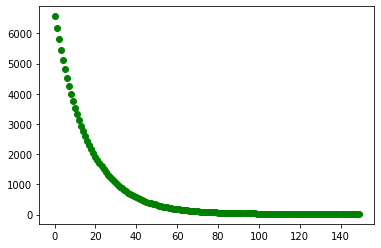

In [ ]:
graph = []
for i in range(150):
    cost = cost_function()
    gradient_descent()
    print("Yeni maliyet fonksiyonu" , cost)
    graph.append(cost)
plt.scatter(x = range(len(graph)) , y = graph  , color = 'green')
plt.xlabel = "Adım"
plt.ylabel = "Maliyet"
plt.title = "Maliyet Fonksiyonu Grafiği 20 Adım İçin"
plt.show

Görüldüğü üzere Maliyet Fonksiyonu 90. iterasyondan sonra daha düşük ivme ile azalmaya başlamıştır.Algoritma yeteri kadar adımda çalıştırılmadığı için global minimum noktası tespit edilememiştir.

Adım 3: Yapılan öğrenme sonrası veriler üzerinde denemeler.

In [ ]:
for i in range (150,200):
  print(i,"inci örnek için hata oranı %",abs(data.values[i][2] - prediction(data.values[i][0],data.values[i][1]))/data.values[i][2])

150 inci örnek için hata oranı % 69.96449921048185
151 inci örnek için hata oranı % 88.83401254124624
152 inci örnek için hata oranı % 166.68816822750634
153 inci örnek için hata oranı % 71.90346940715106
154 inci örnek için hata oranı % 226.95361884180906
155 inci örnek için hata oranı % 272.71589688896665
156 inci örnek için hata oranı % 177.6961900043717
157 inci örnek için hata oranı % 128.05489360403814
158 inci örnek için hata oranı % 198.41861398532265
159 inci örnek için hata oranı % 36.664049837775046
160 inci örnek için hata oranı % 23.616056167335554
161 inci örnek için hata oranı % 24.346551113240128
162 inci örnek için hata oranı % 86.35247404831749
163 inci örnek için hata oranı % 10.151895735126692
164 inci örnek için hata oranı % 45.51952832382221
165 inci örnek için hata oranı % 66.2179940386148
166 inci örnek için hata oranı % 157.90599746486498
167 inci örnek için hata oranı % 42.93116033974485
168 inci örnek için hata oranı % 58.78189021409246
169 inci örnek için ha

Sonuç

Gradient Descent Algoritması her çalıştığında maliyet fonksiyonu ilk başlarda olumlu yönde hızlı bir eğilim göstermiştir fakat öğrenme sonrası yapılan tahminlerin hata oranı pek kabul edilebilir değildir.